In [28]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import string
import nltk
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

In [7]:
df_2015 = pd.read_csv("/Users/revan/Downloads/2015.csv")
df_2016 = pd.read_csv("/Users/revan/Downloads/2016.csv")
df_2017 = pd.read_csv("/Users/revan/Downloads/2017.csv")
df_2018 = pd.read_csv("/Users/revan/Downloads/2018.csv")
df_2019 = pd.read_csv("/Users/revan/Downloads/2019.csv")
df_2020 = pd.read_csv("/Users/revan/Downloads/2020.csv")
df_2021 = pd.read_csv("/Users/revan/Downloads/2021.csv")
df_2022 = pd.read_csv("/Users/revan/Downloads/2022.csv")

In [13]:
elon_all_tweet = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022], 
                           ignore_index=True)

In [34]:
elon_all_tweet

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,679163784062107649,679163784062107649,1450760239000.0,2015-12-22 04:57:19,0,NaN,High res video of landing from the helo https...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,679145544673923072,679145544673923072,1450755890000.0,2015-12-22 03:44:50,0,NaN,Live video from LZ-1 https://t.co/Ve6gEXfOdh,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,679142215981993984,679142215981993984,1450755096000.0,2015-12-22 03:31:36,0,NaN,Falcon 9 standing on LZ-1 at Cape Canaveral h...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,679138271084064768,679127406813188097,1450754156000.0,2015-12-22 03:15:56,0,NaN,@morganpage thanks!,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,679137936416329728,679137936416329728,1450754076000.0,2015-12-22 03:14:36,0,NaN,There and back again https://t.co/Ll7wg2hL1G,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32872,NaN,1477775713172402176,1477775713172402176,2022-01-03 02:56:00 Arabian Standard Time,2022-01-03,400,NaN,https://t.co/LA9hPzVlGx,und,[],...,[],NaN,NaN,NaN,NaN,02:56:00,[],25611.0,51383.0,473530.0
32873,NaN,1477706142461706248,1477706142461706248,2022-01-02 22:19:33 Arabian Standard Time,2022-01-02,400,NaN,Let’s make the roaring 20’s happen!,en,[],...,[],NaN,NaN,NaN,NaN,22:19:33,[],22500.0,26951.0,320201.0
32874,NaN,1477700424933253123,1477700424933253123,2022-01-02 21:56:50 Arabian Standard Time,2022-01-02,400,NaN,Great work by Tesla team worldwide!,en,[],...,[],NaN,NaN,NaN,NaN,21:56:50,[],5630.0,4459.0,66405.0
32875,NaN,1477096955658579974,1476958174439567360,2022-01-01 05:58:52 Arabian Standard Time,2022-01-01,400,NaN,@BLKMDL3 @Tesla 🔥,und,[],...,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN,05:58:52,[],1074.0,472.0,45704.0


In [35]:
STOP_WORDS = set(stopwords.words('english'))
english_punctuations = string.punctuation
punctuations_list = english_punctuations
translator = str.maketrans('', '', punctuations_list)
tokenizer = RegexpTokenizer(r'\w+')
st = nltk.PorterStemmer()
lmtzr = WordNetLemmatizer()

In [54]:
Emoji_Pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

def clean_text(text_str):
    text_str = text_str.lower()
    text_str = re.sub(r"http\S+", "", text_str) #removes links
    text_str = re.sub(r'\d+',"", text_str)
    text_str = re.sub(r'[^\w\s]', " ", text_str) #removes punctuation
    text_str = remove_emojis(text_str)
    tokens = nltk.word_tokenize(text_str)
    tokens = [word for word in tokens if word not in STOP_WORDS and len(word) > 3]
    lemmas = [lmtzr.lemmatize(word, pos= 'v') for word in tokens]
    return ' '.join(lemmas)

def remove_emojis(tweet):
    return Emoji_Pattern.sub(r'', tweet)

In [55]:
elon_all_tweet["clean_tweet"] = elon_all_tweet["tweet"].map(clean_text)

In [56]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [72]:
elon_all_tweet.to_csv("/Users/revan/Downloads/elon_tweets.csv", index=False)

In [57]:
elon_string = elon_all_tweet['clean_tweet']

In [58]:
elon_string

0                   high video land helo
1                             live video
2            falcon stand cape canaveral
3                       morganpage thank
4                                   back
                      ...               
32872                                   
32873                   make roar happen
32874    great work tesla team worldwide
32875                       blkmdl tesla
32876      mifsdbetatester wholemarsblog
Name: clean_tweet, Length: 32877, dtype: object

In [59]:
wc_string = ','.join(map(str, elon_string))

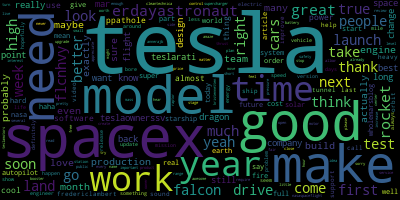

In [60]:
wordcloud = WordCloud(collocations=False).generate(wc_string)
wordcloud.to_image()

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('whitegrid')

In [62]:
def plot_10_most_common_words(count_data, count_vectorizer):

    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    #plot
    #plt.figure(2, figsize=(15, 15/1.6180))
    #plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=45)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()

In [63]:
count_vectorizer = CountVectorizer(stop_words='english')

In [64]:
count_data = count_vectorizer.fit_transform(elon_string.apply(lambda x: np.str_(x)))

/Users/revan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


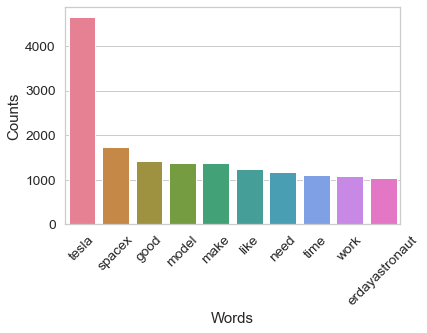

In [65]:
plot_10_most_common_words(count_data, count_vectorizer)

In [66]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [67]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [68]:
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)

In [69]:
lda.fit(count_data)

LatentDirichletAllocation(n_jobs=-1)

In [70]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
for i in topic.argsort()[:-n_top_words -
1:-1]]))

In [71]:
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
tesla rocket launch falcon land spacex good dragon orbit mar

Topic #1:
tesla come model soon sure motor time wholemarsblog year teslaownerssv

Topic #2:
tesla best cars like launch space build time autopilot spacex

Topic #3:
tesla flcnhvy haha cleantechnica model like true ppathole make teslaownerssv

Topic #4:
tesla need make solar power drive sorry time self release

Topic #5:
erdayastronaut work spacex teslarati tesla rocket flight company need bore

Topic #6:
good spacex point erdayastronaut tesla make like need people work

Topic #7:
spacex exactly good tesla order production nasa start fredericlambert thank

Topic #8:
tesla thank great people work make year time think change

Topic #9:
tesla like model love nichegamer course soon vincent mean come


/Users/revan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
